In [1]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

import numpy as np

In [2]:
import os
dirname = os.getcwd()
parent_dirname = os.path.dirname(dirname)

In [3]:
# Read in price data
df = pd.read_csv(os.path.join(parent_dirname, 'data/raw/adj_price_daily.csv'),
                 parse_dates=True, 
                 index_col="Date")

In [4]:
# Calculate daily returns
# ret = (df - df.shift()) / df.shift()
ret = np.log(df) - np.log(df.shift())
# do not drop NA

In [5]:
# remove STI
ret = ret.drop('^STI', axis=1)

In [6]:
# Calculate mean and covariance of monthly log return
mu = ret.mean() * 30
S = ret.cov() * 30

In [7]:
# Plot the portfolios
plot_df = pd.DataFrame({'mu':mu, 'S':np.sqrt(np.diag(S))})

In [8]:
plot_df

,mu,S
D05.SI,0.015339,0.050557
G13.SI,-0.002961,0.065913
S58.SI,0.014854,0.054060
S63.SI,0.002754,0.057677
S68.SI,0.037786,0.054967


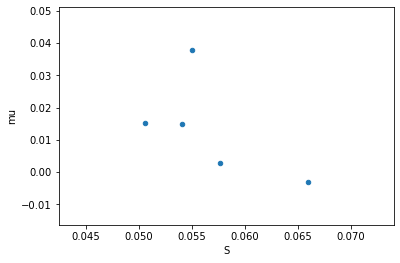

In [9]:
plot_df.plot.scatter(x='S', y='mu')

In [10]:
# Calculate correlation
r = ret.corr()
r

,D05.SI,G13.SI,S58.SI,S63.SI,S68.SI
D05.SI,1.000000,0.443734,0.380989,0.332837,0.290440
G13.SI,0.443734,1.000000,0.222148,0.242927,0.118996
S58.SI,0.380989,0.222148,1.000000,0.296090,0.193208
S63.SI,0.332837,0.242927,0.296090,1.000000,0.299719
S68.SI,0.290440,0.118996,0.193208,0.299719,1.000000


In [11]:
# Portfolio analysis
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))

In [12]:
# optimize wrt max sharpe ratio
raw_weights = ef.max_sharpe(risk_free_rate=0.02)
cleaned_weights = ef.clean_weights()

In [13]:
# View clean weights
cleaned_weights

{'D05.SI': 0.0, 'G13.SI': 0.0, 'S58.SI': 0.0, 'S63.SI': 0.0, 'S68.SI': 1.0}

In [14]:
ef.portfolio_performance(verbose=True)

Expected annual return: 3.8%
Annual volatility: 5.5%
Sharpe Ratio: 0.32


(0.03778560532880037, 0.054967383589577166, 0.32356652558905585)

In [15]:
# how much of each stock to buy?
capital = 10000

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)

da = DiscreteAllocation(raw_weights, latest_prices, total_portfolio_value=capital)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

4 out of 5 tickers were removed
Discrete allocation: {'S68.SI': 1092}
Funds remaining: $8.20
